# Model Exercises

## <font color = "blue">Decision Tree Exercises<font color = "black"> 

**Using the *titanic* data, in your classification-exercises repository, create a notebook, ```model.ipynb``` where you will do the following:**

## Decision Tree: Exercise 1

**What is your baseline prediction? What is your baseline accuracy?** *remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.*


In [156]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from env import host, password, user 
import numpy as np
import pandas as pd
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix

import prepare
import acquire


import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
from graphviz import Graph

In [157]:
#acquiring data
titanic_raw = acquire.get_titanic_data()

#take a look at data
titanic_raw.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [158]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def handle_missing_values(df):
    return df.assign(
        embark_town=df.embark_town.fillna('Southampton'),
        embarked=df.embarked.fillna('O'),
    )

def remove_columns(df):
    return df.drop(columns=['deck'])

def encode_embarked(df):
    encoder = LabelEncoder()
    encoder.fit(df.embarked)
    return df.assign(embarked_encode = encoder.transform(df.embarked))

def prep_titanic_data(df):
    df = df\
        .pipe(handle_missing_values)\
        .pipe(remove_columns)\
        .pipe(encode_embarked)
    return df

def train_validate_test_split(df, seed=123):
    train_and_validate, test = train_test_split(
        df, test_size=0.2, random_state=seed, stratify=df.survived
    )
    train, validate = train_test_split(
        train_and_validate,
        test_size=0.3,
        random_state=seed,
        stratify=train_and_validate.survived,
    )
    return train, validate, test

In [159]:
titanic = prep_titanic_data(titanic_raw)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     891 non-null    int64  
 1   survived         891 non-null    int64  
 2   pclass           891 non-null    int64  
 3   sex              891 non-null    object 
 4   age              714 non-null    float64
 5   sibsp            891 non-null    int64  
 6   parch            891 non-null    int64  
 7   fare             891 non-null    float64
 8   embarked         891 non-null    object 
 9   class            891 non-null    object 
 10  embark_town      891 non-null    object 
 11  alone            891 non-null    int64  
 12  embarked_encode  891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [160]:
titanic = titanic.drop(columns=['passenger_id','pclass','embarked','embarked_encode', 'age'])

In [161]:
# encode variables
dummies = pd.get_dummies(titanic[['embark_town', 'sex', 'class']], drop_first=True)
titanic = pd.concat([titanic, dummies], axis = 1)

In [162]:
# drop the old columns
titanic = titanic.drop(columns=['embark_town', 'sex', 'class'])
titanic.head()

,survived,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,class_Second,class_Third
0,0,1,0,7.2500,0,0,1,1,0,1
1,1,1,0,71.2833,0,0,0,0,0,0
2,1,0,0,7.9250,1,0,1,0,0,1
3,1,1,0,53.1000,0,0,1,0,0,0
4,0,0,0,8.0500,1,0,1,1,0,1


In [163]:
#split the data
train, validate, test = train_validate_test_split(titanic)

In [164]:
train.shape, validate.shape, test.shape

((498, 10), (214, 10), (179, 10))

In [165]:
# We will be attempting to make a Decision Tree Classifier Model that will predict survival on the 
# Titanic that performs better than the baseline.

#target = survived (1)



In [166]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [167]:
train['baseline_assumption_not_survived'] = 0
baseline_accuracy = (train.survived == train.baseline_assumption_not_survived).mean()
baseline_accuracy 

0.6164658634538153

## Decision Tree: Exercise 2

**Fit the decision tree classifier to your training sample and transform.** (i.e. make predictions on the training sample)

In [168]:
# Let's generate a blank, new Decision Tree model
# Be sure to set the max_depth argument

clf1 = DecisionTreeClassifier()

In [169]:
# Setup our X inputs and y target variable for each split
X_train = train.drop(columns=['survived'])
y_train = train.survived # labeled data == supervise algorithm

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [170]:
# Now let's train our model on the training data
# fitting == training the model
clf = clf1.fit(X_train, y_train)
clf

DecisionTreeClassifier()

In [171]:
# Visualize the model so it can explain itself!
# dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
# graph = graphviz.Source(dot_data) 

# graph.render('tips_decision_tree', view=True)

## Decision Tree: Exercise 3

**Evaluate your in-sample results using the model score, confusion matrix, and classification report.**

In [172]:
# Now we'll make a set of predictions using this trained model
y_pred = clf1.predict(X_train)
pd.Series(y_pred).value_counts()

0    330
1    168
dtype: int64

In [173]:
# Model score on accuracy:
accuracy = clf1.score(X_train,y_train)
accuracy

0.9457831325301205

In [174]:
# confusion matrix
conf = confusion_matrix(y_train, y_pred)
conf

array([[305,   2],
       [ 25, 166]])

In [175]:
class_report = classification_report(y_train, y_pred, output_dict = True)
class_report

{'0': {'precision': 0.9242424242424242,
  'recall': 0.993485342019544,
  'f1-score': 0.9576138147566718,
  'support': 307},
 '1': {'precision': 0.9880952380952381,
  'recall': 0.8691099476439791,
  'f1-score': 0.9247910863509748,
  'support': 191},
 'accuracy': 0.9457831325301205,
 'macro avg': {'precision': 0.9561688311688312,
  'recall': 0.9312976448317616,
  'f1-score': 0.9412024505538233,
  'support': 498},
 'weighted avg': {'precision': 0.9487321580695075,
  'recall': 0.9457831325301205,
  'f1-score': 0.9450251779585028,
  'support': 498}}

In [176]:
pd.DataFrame(class_report).rename({0: 'death', 1: 'survived'}).T

,precision,recall,f1-score,support
0,0.924242,0.993485,0.957614,307.000000
1,0.988095,0.869110,0.924791,191.000000
accuracy,0.945783,0.945783,0.945783,0.945783
macro avg,0.956169,0.931298,0.941202,498.000000
weighted avg,0.948732,0.945783,0.945025,498.000000


## Decision Tree: Exercise 4

**Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.**

In [177]:
conf

array([[305,   2],
       [ 25, 166]])

In [178]:
conf_df = pd.DataFrame(conf, columns=['predict_death','predict_survive'], index = ['actual_death', 'actual_survive'])

In [179]:
conf_df

,predict_death,predict_survive
actual_death,305,2
actual_survive,25,166


In [180]:
rubric_df = pd.DataFrame([['true negative','false positive'],['false negative', 'true positive']], columns=['predict_death','predict_survive'], index = ['actual_death', 'actual_survive'])

In [181]:
rubric_df

,predict_death,predict_survive
actual_death,true negative,false positive
actual_survive,false negative,true positive


In [182]:
# create a function to calculate these metrics

def get_metrics_binary(cnf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a 
    binary classifier and prints out metrics based on values in 
    variables named X_train, y_train, and y_pred.
    
    returns a classification report dataframe (transposed).
    '''
    accuracy = clf.score(X_train,y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict = True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    True Positive Rate is {tpr:.3}, False Positive Rate is {fpr:.3},
    True Negative Rate is {tnr:.3}, False Negative Rate is {fnr:.3}
    ''')
    return class_report



In [183]:
# call the function
report_df = get_metrics_binary(clf1)
report_df


    The accuracy for our model is 0.9458
    True Positive Rate is 0.869, False Positive Rate is 0.00651,
    True Negative Rate is 0.993, False Negative Rate is 0.131
    


,precision,recall,f1-score,support
0,0.924242,0.993485,0.957614,307.000000
1,0.988095,0.869110,0.924791,191.000000
accuracy,0.945783,0.945783,0.945783,0.945783
macro avg,0.956169,0.931298,0.941202,498.000000
weighted avg,0.948732,0.945783,0.945025,498.000000


## Decision Tree: Exercise 5

**Run through steps 2-4 using a different ```max_depth``` value.**

In [184]:
#clf2
clf2 = DecisionTreeClassifier(max_depth=3)

In [185]:
#fit the model

clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [186]:
y_pred = clf2.predict(X_train)

## Decision Tree: Exercise 6

**Which model performs better on your in-sample data?**

In [188]:
report_df = get_metrics_binary(clf2)


    The accuracy for our model is 0.9458
    True Positive Rate is 0.702, False Positive Rate is 0.101,
    True Negative Rate is 0.899, False Negative Rate is 0.298
    


In [189]:
report_df

,precision,recall,f1-score,support
0,0.828829,0.899023,0.862500,307.000000
1,0.812121,0.701571,0.752809,191.000000
accuracy,0.823293,0.823293,0.823293,0.823293
macro avg,0.820475,0.800297,0.807654,498.000000
weighted avg,0.822421,0.823293,0.820430,498.000000


## Decision Tree: Exercise 7

**Which model performs best on your out-of-sample data, the ```validate``` set?**

In [190]:
# get predictions for our validation sets
y_val_pred_1 = clf1.predict(validate)
y_val_pred_2 = clf2.predict(validate)


In [191]:
# get validation accuracy
accuracy_v_1 = clf1.score((validate), validate.survived)
accuracy_v_2 = clf2.score((validate), validate.survived)

In [192]:
accuracy_v_1, accuracy_v_2

(0.43457943925233644, 0.6074766355140186)

In [193]:
dot_data = export_graphviz(clf2, feature_names= X_train.columns, rounded = True, filled = True, out_file=None)
graph = graphviz.Source(dot_data)

In [117]:
graph.render('titanic_model_2_tree', view=True)

'titanic_model_2_tree.pdf'

In [194]:
dot_data = export_graphviz(clf2, feature_names= X_train.columns, rounded = True, filled = True, out_file=None)
graph = graphviz.Source(dot_data)

In [148]:
graph.render('titanic_model_1_tree', view=True)

'titanic_model_1_tree.pdf'

## <font color = "blue">Random Forest Exercises<font color = "black"> 

## Random Forest: Exercise 1

**Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.**


In [260]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
rf = RandomForestClassifier(min_samples_leaf=1,max_depth=10,random_state=123)

In [262]:
# fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

## Random Forest: Exercise 2

**Evaluate your results using the model score, confusion matrix, and classification report.**



In [263]:
#feature importance
print(rf.feature_importances_)

[0.06892937 0.04922884 0.38141952 0.02427634 0.01283513 0.0326652
 0.34010557 0.02025616 0.07028387 0.        ]


In [264]:
y_pred = rf.predict(X_train)

In [265]:
y_pred_proba = rf.predict_proba(X_train)

## Random Forest: Exercise 3

**Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.**



In [266]:
#Score the model for accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf.score(X_train,y_train)))

Accuracy of random forest classifier on training set: 0.94


In [267]:
cnf_1 = (confusion_matrix(y_train, y_pred))
cnf_1

array([[302,   5],
       [ 23, 168]])

In [268]:
def get_metrics_binary(cnf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a 
    binary classifier and prints out metrics based on values in 
    variables named X_train, y_train, and y_pred.
    
    returns a classification report dataframe (transposed).
    '''
    accuracy = cnf.score(X_train,y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict = True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    True Positive Rate is {tpr:.3}, False Positive Rate is {fpr:.3},
    True Negative Rate is {tnr:.3}, False Negative Rate is {fnr:.3}
    ''')
    return class_report




get_metrics_binary(rf)


    The accuracy for our model is 0.9438
    True Positive Rate is 0.88, False Positive Rate is 0.0163,
    True Negative Rate is 0.984, False Negative Rate is 0.12
    


,precision,recall,f1-score,support
0,0.929231,0.983713,0.955696,307.000000
1,0.971098,0.879581,0.923077,191.000000
accuracy,0.943775,0.943775,0.943775,0.943775
macro avg,0.950165,0.931647,0.939387,498.000000
weighted avg,0.945288,0.943775,0.943186,498.000000


In [269]:
pd.DataFrame(classification_report(y_train,y_pred, output_dict=True)).rename(columns={'0': 'deceased', '1': 'survived'}).T

,precision,recall,f1-score,support
deceased,0.929231,0.983713,0.955696,307.000000
survived,0.971098,0.879581,0.923077,191.000000
accuracy,0.943775,0.943775,0.943775,0.943775
macro avg,0.950165,0.931647,0.939387,498.000000
weighted avg,0.945288,0.943775,0.943186,498.000000


## Random Forest: Exercise 4

**Run through steps increasing your min_samples_leaf and decreasing your max_depth.**



In [270]:
rf1 = RandomForestClassifier(min_samples_leaf=3, max_depth=3,random_state=123)

In [271]:
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [272]:
#feature importance
print(rf1.feature_importances_)

[0.06267687 0.0187328  0.18693544 0.04129274 0.01346748 0.03571904
 0.4893116  0.01451785 0.13734617 0.        ]


In [273]:
#Score the model for accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf1.score(X_train,y_train)))

Accuracy of random forest classifier on training set: 0.82


In [274]:
def get_metrics_binary(cnf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a 
    binary classifier and prints out metrics based on values in 
    variables named X_train, y_train, and y_pred.
    
    returns a classification report dataframe (transposed).
    '''
    accuracy = cnf.score(X_train,y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict = True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    True Positive Rate is {tpr:.3}, False Positive Rate is {fpr:.3},
    True Negative Rate is {tnr:.3}, False Negative Rate is {fnr:.3}
    ''')
    return class_report




In [275]:
class_report1 = get_metrics_binary(rf1)


    The accuracy for our model is 0.8193
    True Positive Rate is 0.88, False Positive Rate is 0.0163,
    True Negative Rate is 0.984, False Negative Rate is 0.12
    


In [276]:
print('Model #1: min samples 1, max depth 10')
class_report_val = get_metrics_binary(rf)
print('-------------------------------------------\n Model #2: min samples 3, max_depth 3\n')
class_report_val1 = get_metrics_binary(rf1)

Model #1: min samples 1, max depth 10

    The accuracy for our model is 0.9438
    True Positive Rate is 0.88, False Positive Rate is 0.0163,
    True Negative Rate is 0.984, False Negative Rate is 0.12
    
-------------------------------------------
 Model #2: min samples 3, max_depth 3


    The accuracy for our model is 0.8193
    True Positive Rate is 0.88, False Positive Rate is 0.0163,
    True Negative Rate is 0.984, False Negative Rate is 0.12
    


## Random Forest: Exercise 5

**What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?**


In [278]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[302,   5],
       [ 23, 168]])

In [281]:
#make a key for reference
rubric_df = pd.DataFrame([['true negative', 'false positive'], ['false negative', 'true positive']], index = ['actual_death','actual_survive'])
rubric_df

,0,1
actual_death,true negative,false positive
actual_survive,false negative,true positive


**After making a few models, which one has the best performance (or closest metrics) on both train and validate?**

In [ ]:
# accuracy:
# accuracy = (true positives + true negatives) / (true positives + true negatives + false positives + false negatives)

# True Positive Rate: Sensitivity
# RECALL for the positive class --> out of those that actually survived, how many did we predict would survive?
# TPR = true positives / (true positives + false negatives)
#  If we wanted to calculate PRECISION, it would be true positives / (true positives + false postives)
# Recall being true positives over the sum of the row, precision being the true positive over the sum of the column
# i.e, out of the values we predicted survived, how many were actual survivors?

# False Positive Rate: 
# FPR = false positives / (false positive + true negatives)

# True Negative Rate: Specificity
# Recall for the negative class --> out of those that perished, how many did we predict would not make it?
# TNR = true negatives / (true negatives + false positives)

# False negative rate:
# FNR = false negatives / (false negatives + true positives)

## <font color = 'blue'>K-Nearest Neighbor<font color = 'black'>

**Continue working in your ```model``` file with the *titanic* dataset.**


## KNN: Exercise 1

**Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)**



## KNN: Exercise 2

**Evaluate your results using the model score, confusion matrix, and classification report.**


## KNN: Exercise 3

**Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.**


## KNN: Exercise 4

**Run through steps 2-4 setting k to 10**



## KNN: Exercise 5

**Run through setps 2-4 setting k to 20**



## KNN: Exercise 6

**What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?**


## KNN: Exercise 7

**Which model performs best on our out-of-sample data from ```validate```?**

## <font color = 'blue'>Logistic Regression Exercises<font color = 'black'>

In these exercises, we'll continue working with the *titanic* dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, **choose a threshold that optimizes for accuracy.**

Do your work for these exercises in either a notebook or a python script named ```model``` within your classification-exercises repository. Add, commit, and push your work.


## Logistic Regression: Exercise 1

**Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?**



## LR: Exercise 2

**Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.**



## LR: Exercise 3

**Try out other combinations of features and models.**

## LR: Exercise 4

**Use you best 3 models to predict and evaluate on your validate sample.**



## LR: Exercise 5

**Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?**



## Bonus 1:

**How do different strategies for handling the missing values in the age column affect model performance?**



## Bonus 2:

**How do different strategies for encoding sex affect model performance?**


## Bonus 3: 

**```scikit-learn```'s ```LogisticRegression``` classifier is actually applying ```a regularization penalty to the coefficients``` by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the ```C``` hyper parameter. Small values of ```C``` correspond to a larger penalty, and large values of ```C``` correspond to a smaller penalty.**

**Try out the following values for ```C``` and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.**

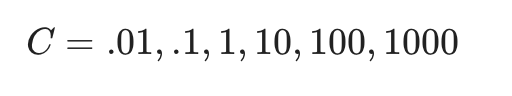

## Bonus Bonus

 **how does scaling the data interact with your choice of ```C```?**